# Lecture 5 Text Mining

Many of the examples below are taken from the [NLTK book](http://www.nltk.org/book/). Before we start, we should install the required materials. Run the cell below to install the tools and the corpora. This can take a minute...

In [5]:
%matplotlib inline
import nltk
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/ivanfeng/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/ivanfeng/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/ivanfeng/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/ivanfeng/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/ivanfeng/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/ivanfeng/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data

True

### Introduction to Python's Natural Language Toolkit (NLTK)

In the Digital Humanities, we often treat texts as *raw data*, as input for our programs. Interpretations arise from abstraction, for example, by counting word frequencies, analysing specific segments of a corpus (i.e. KeyWord In Context, or KWIC analysis) or searching for patterns (i.e. collocations). 

NLTK provides several tools for both **processing** data and **interpreting** texts.

Let's inspect the tools NLTK provides us with.

First of all, NLTK helps us with "tokenization", a tool that breaks a string into separate "words" (the basic units of a text document also called tokens, ).

To apply tokenization, we need to import the `word_tokenize` tool using the `import` syntax below.

In [6]:
from nltk.tokenize import word_tokenize

We can apply this function to any English text: it will identify the tokens and separate strings from punctuation. A string is just a sequence of characters. However, for simple tasks, such as word counting, we need to split up this string by token.

Below we first lowercase the string and then tokenize it.

In [3]:
example_sentence = "Downing Street has said it is “extremely concerning” that MPs could attempt to override the government to suspend or delay the article 50 process to leave the EU in their effort to prevent a no-deal Brexit."
print(example_sentence)

Downing Street has said it is “extremely concerning” that MPs could attempt to override the government to suspend or delay the article 50 process to leave the EU in their effort to prevent a no-deal Brexit.


In [4]:
example_sentence_lower = example_sentence.lower()
print("example_sentence_lower")

example_sentence_lower


In [5]:
words = word_tokenize(example_sentence_lower)
print(words)

['downing', 'street', 'has', 'said', 'it', 'is', '“', 'extremely', 'concerning', '”', 'that', 'mps', 'could', 'attempt', 'to', 'override', 'the', 'government', 'to', 'suspend', 'or', 'delay', 'the', 'article', '50', 'process', 'to', 'leave', 'the', 'eu', 'in', 'their', 'effort', 'to', 'prevent', 'a', 'no-deal', 'brexit', '.']


#### Exercise

Select the first sentence of [Alice in Wonderland](http://www.gutenberg.org/cache/epub/28885/pg28885.txt), lowercase and then tokenize the string.

In [7]:
# insert code here
Alice = 'ALICE was beginning to get very tired of sitting by her sister on the bank'
Alice_lower = Alice.lower()
words = word_tokenize(Alice_lower)
print (words)

['alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank']


After tokenization, we can easily compute the word frequency with the `nltk.FreqDist()` function.

In [8]:
example_words = word_tokenize(example_sentence)
nltk.FreqDist(example_words)

FreqDist({'to': 4, 'the': 3, 'Downing': 1, 'Street': 1, 'has': 1, 'said': 1, 'it': 1, 'is': 1, '“': 1, 'extremely': 1, ...})

If we'd like to know the frequency of one specific word we put this word between square brackets.

In [9]:
fq = nltk.FreqDist(words)
fq['the']

1

#### Exercise

What is the frequency of the word 'to' and 'street'?

In [11]:
# insert code here
print (fq['to'], fq['street'])


1 0


`nltk.FreqDist` return the absolute counts. To compute the **relative frequency**, the word count has to be divided by the total number of tokens.

#### Exercise

Can you compute the relative frequency of the word "the" in the example sentence below?

In [19]:
example_sentence = "Downing Street has said it is “extremely concerning” that MPs could attempt to override the government to suspend or delay the article 50 process to leave the EU in their effort to prevent a no-deal Brexit."
words = word_tokenize(example_sentence.lower())
fq = nltk.FreqDist(words)
rf = fq['the']/len(words)
rf
# insert code here

0.07692307692307693

In [139]:
# how to exclude punctuation marks
from nltk.tokenize import regexp_tokenize
regexp_tokenize(example_sentence,pattern='\w+')

['Downing',
 'Street',
 'has',
 'said',
 'it',
 'is',
 'extremely',
 'concerning',
 'that',
 'MPs',
 'could',
 'attempt',
 'to',
 'override',
 'the',
 'government',
 'to',
 'suspend',
 'or',
 'delay',
 'the',
 'article',
 '50',
 'process',
 'to',
 'leave',
 'the',
 'EU',
 'in',
 'their',
 'effort',
 'to',
 'prevent',
 'a',
 'no',
 'deal',
 'Brexit']

#### Exercise

The code below downloads the text of Shakespeare's Romeo and Juliet and saves it in the variable `randj`.
Perform the following steps:
- Lowercase the text;
- Tokenize the lowercased text; save the tokens in a new variable with the name `randj_tokens`.
- How many tokens does Romeo and Julia contain? How many characters?
- Make a frequency table, compute the relative frequency of the word "love"

In [27]:
import requests
randj = requests.get('http://www.gutenberg.org/cache/epub/1112/pg1112.txt').text

In [28]:
# insert code 
randj_lower = randj.lower()
randj_tokens = word_tokenize(randj_lower)
print (len (randj_tokens),len(str(randj_tokens)))
fq = nltk.FreqDist(randj_tokens)
rf = fq['love']/len(randj_tokens)
rf

36612 274977


0.003960450125641866

## Text in Context

After tokenizing the text we can apply a bunch of NLTK tools. Below we use the example of Kipling's [Jungle Book](http://www.gutenberg.org/cache/epub/35997/pg35997.txt). 

We first tokenize the book.

In [29]:
import requests
jungle_book = requests.get('http://www.gutenberg.org/cache/epub/35997/pg35997.txt').text
jungle_book_tokens = word_tokenize(jungle_book)

In [30]:
type(jungle_book_tokens)

list

`word_tokenize` returns a `list` object. Lists are useful for storing information, but not for analysing texts. To allow for more refined text analysis we have to **convert** the list to an NLTK Text object. This type of conversion (from a list to a NLTK text) is performed by the code below.

In [31]:
jungle_nltk_text = nltk.text.Text(jungle_book_tokens)

In [32]:
type(jungle_nltk_text)

nltk.text.Text

Once we tranformed the text into an NLTK Text object we can apply several useful tools.

### `.concordance()`

An oft-used technique for distant reading is **Keyword In Context Analysis** in which we centre a whole corpus on a specific word of interest. NLTK comes with a `concordance()` method that allows you to do just this. Let's analyse how the word "love" in Jungle book:

In [33]:
jungle_nltk_text.concordance("love")

Displaying 9 of 9 matches:
in the jungle for fear of those that love thee ; but remember , Akela is very 
s , and I was born among men , and I love thee , Little Brother . The others t
I or Baloo or those of the Pack that love thee . Get the Red Flower . '' By Re
 bruised from head to foot by me who love him than that he should come to harm
e jungles ; and besides , I -- we -- love him , Kaa . '' `` _Ts ! Ts ! _ '' sa
 and fro . `` I also have known what love is . There are tales I could tell th
ever . I will always remember that I love thee and all in our cave ; but also 
Shere Khan gives me his coat for the love that he bears me . Pull , Gray Broth
ce . I am getting old , and I do not love wild elephants , Give me brick eleph


We can specify the number of hits to print with the `lines` argument.

In [34]:
jungle_nltk_text.concordance("black",lines=35)

Displaying 35 of 35 matches:
could handle a buck alone , to young black three-year-olds who thought they cou
bs . Who speaks besides Baloo ? '' A black shadow dropped down into the circle 
o the circle . It was Bagheera , the Black Panther , inky black all over , but 
 Bagheera , the Black Panther , inky black all over , but with the panther mark
th his head on Bagheera 's beautiful black skin : `` Little Brother , how often
thou_ art a man 's cub , '' said the Black Panther , very tenderly ; '' and eve
nly ; and he frowned under his heavy black eyebrows . `` What is the Law of the
get up and feed it in the night with black lumps ; and when the morning came an
s the boy stood all naked , his long black hair tossing over his shoulders in t
than this . Sometimes Bagheera , the Black Panther , would come lounging throug
 think how small he is , '' said the Black Panther , who would have spoiled Mow
? Put dead bats on my head ! Give me black bones to eat ! Roll me into the hive
at would th

#### Exercise

How is the word love used in Romeo and Juliet? The code below downloads Romeo and Juliet, continue the code.

In [36]:
import requests
randj = requests.get('http://www.gutenberg.org/cache/epub/1112/pg1112.txt').text
# insert code here
randj_tokens = word_tokenize(randj)
randj_nltk_text = nltk.text.Text(randj_tokens)
randj_nltk_text.concordance("love",lines=15)

Displaying 15 of 145 matches:
arful passage of their death-mark 'd love , And the continuance of their paren
h having makes them short . Ben . In love ? Rom . Out- Ben . Of love ? Rom . O
 Ben . In love ? Rom . Out- Ben . Of love ? Rom . Out of her favour where I am
om . Out of her favour where I am in love . Ben . Alas that love , so gentle i
where I am in love . Ben . Alas that love , so gentle in his view , Should be 
and rough in proof ! Rom . Alas that love , whose view is muffled still , Shou
much to do with hate , but more with love . Why then , O brawling love ! O lov
re with love . Why then , O brawling love ! O loving hate ! O anything , of no
 sleep , that is not what it is This love feel I , that feel no love in this .
t is This love feel I , that feel no love in this . Dost thou not laugh ? Ben 
 's oppression . Rom . Why , such is love 's transgression . Griefs of mine ow
e it prest With more of thine . This love that thou hast shown Doth add more g
more grief to too much

### `.similar()`

`concordance()` shows words in their context. For example, in Moby Dick the word monstrous occurres in contexts such as the \_\_\_ pictures and a \_\_\_ size. What other words appear in a **similar range of contexts**? We can find out by using the `.similar()` method, entering the word you want analyse within parentheses. Below we ask which words are similar to "forest".

In [37]:
jungle_nltk_text.similar("forest")


jungle air world clearing ground pack elephants cave skin sea head
other village beasts darkness water monkeys reward beach mule


#### `.collocations()`

#### Exercise

- Use help() to find out what the `.collocations()` method returns.
- Apply the method to our Jungle Book example.

In [54]:
type(jungle_nltk_text)

nltk.text.Text

In [63]:
# insert code
# help(nltk.text.Text.collocations)
# help(variablename.method)
help (jungle_nltk_text.collocations)
jungle_nltk_text.collocations(num=100,window_size=5)

Help on method collocations in module nltk.text:

collocations(num=20, window_size=2) method of nltk.text.Text instance
    Print collocations derived from the text, ignoring stopwords.
    
    :seealso: find_collocations
    :param num: The maximum number of collocations to print.
    :type num: int
    :param window_size: The number of tokens spanned by a collocation (default=2)
    :type window_size: int

Shere Khan; Kala Nag; Project Gutenberg-tm; Little Toomai; Petersen
Sahib; Two Tails; Father Wolf; Project Gutenberg; Gray Brother; Mother
Wolf; Sea Catch; thou art; Law Jungle; Literary Archive; Council Rock;
Gutenberg-tm electronic; electronic works; Gutenberg-tm works; Archive
Foundation; Literary Foundation; Gutenberg Archive; Gutenberg
Literary; Machua Appa; Project electronic; Big Toomai; United States;
Sea Cow; man cub; Free People; Gutenberg Foundation; Project works;
Preserver Mahadeo; Jungle People; Black Panther; Red Flower; said
troop-horse; said Billy; Project Archive

### 1. Research Scenario: How left and right-wing media depict Mueller

The research scenario below applies these techniques to understand how the New York times depicts Robert S. Mueller. First, we load the data.

Don't worry about the technicality on line two: this command basically tells Python to read everything in "post_message" columns as a string (this step avoids our code the crash in a later stage).

In [51]:
import pandas as pd
nyt = pd.read_csv('https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/nytimes.tab',sep='\t')
nyt['post_message'] = nyt['post_message'].astype(str) # this line is a technicality, use it but do not worry if you don't understand it

Before we tokenize the post messages, we have to join them together in one string. `' '.join()` is the opposite of `.split()`. Inspect the examples below to understand how these functions work.

In [73]:
sentence = 'Hello how are you?'
words = sentence.split() #split() can be counted by blankspace, not by marks 
print (words)
len (words)

['Hello', 'how', 'are', 'you?']


4

In [66]:
print(type(words))

<class 'list'>


In [74]:
sentence_merged =  ' '.join(words)
sentence_merged

'Hello how are you?'

In [75]:
print(type(sentence_merged))

<class 'str'>


To apply the NLTK tools to Facebook "post_messages" we first select a column with the posts, join all the messages into one long string, then save the result in the `posts` variable. These three steps can be executed in just one line. 

In [79]:
posts = ' '.join(nyt['post_message'])

To understand what happens here, analyse the code below, that use just the first three post messages.

In [82]:
posts_example = nyt['post_message'][:3]
print(posts_example)

0    The hire is part of a flurry of activity by Se...
1     What we don t want is the perception that we ...
2    Mike Pompeo’s claim that the Donald J. Trump a...
Name: post_message, dtype: object


In [83]:
# how to merge all messages into one (as 'str')
posts_merged_example = ' '.join(posts_example)
print(posts_merged_example)

The hire is part of a flurry of activity by Senator Kirsten Gillibrand in recent weeks as the 2020 campaign gets underway.  What we don t want is the perception that we re a dusty border town with burros and carts  AK-47s being fired every 30 minutes and Molotov cocktails being thrown. Because that’s not what s happening in McAllen   said a city commissioner. Mike Pompeo’s claim that the Donald J. Trump administration has been  clear  about withdrawing troops from Syria ignored clearly contradictory statements.


Once all the post messages are stored as one string. This string is tokenized with `word_tokenize` and subsequently converted to an NLTK object.

In [85]:
posts_tokens = word_tokenize(posts)
nltk_posts = nltk.text.Text(posts_tokens)

In [86]:
nltk_posts.concordance("Mueller")

Displaying 3 of 3 matches:
We re live with Ellen Barry and Ben Mueller New York Times international corres
 Rod Rosenstein has defended Robert Mueller against attacks from Donald J. Trum
oke on a variety of topics like the Mueller investigation and Stormy Daniels wh


#### Exercise

How does Fox News report about Mueller? Use [these data](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab).


In [134]:
# insert code here
import pandas as pd
fn = pd.read_csv('https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab',sep='\t')
fn['post_message'] = fn['post_message'].astype(str)
posts = ' '.join(fn['post_message'])
post_tokens = word_tokenize('posts')
posts_tokens = word_tokenize(posts)
nltk_posts = nltk.text.Text(posts_tokens)

nltk_posts.concordance("Mueller")

Displaying 7 of 7 matches:
 the team of Special Counsel Robert Mueller has been extended Fox News has lear
t s time for Special Counsel Robert Mueller to put up or shut up . Amazon could
ime to strongly consider firing Bob Mueller . – Dan Bongino https : //bit.ly/2w
 Duncan said Special Counsel Robert Mueller ’ s team was one holdout juror away
ain rally tonight . For months team Mueller has unsuccessfully tried to turn th
s brought by Special Counsel Robert Mueller . https : //fxn.ws/2JOF1vN BREAKING
tions of former FBI Director Robert Mueller who now leads the special counsel R


#### \*\*\* Exercise

In this exercise, we will investigate the text of Facebook posts in relation to the reactions they received. More specifically we look at what makes different audiences angry or happy when they are confronted with news about about Trump.

Use these data
- [New York Times]('https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/nytimes.tab')
- [Fox News]('https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab')

So, again for each of these pages (and each of the emotions):
- Compute the ratio of angry and love reactions (by dividing the number of angry/love reactions type by the total number of reactions);
- Select posts with a ratio of love (or angry) reactions higher than 0.3;
- Save the rows that match these conditions in a new DataFrame (for example `df_nyt_angry`);
- Concatenate the post messages into one string, split this string into tokens;
- Convert the resulting list to an NLTK Text object. Use `.concordance()` to investigate what these supposedly angry or happy posts are about?
- Compute the word frequencies. Based on your KWIC analysis, select a few interesting words and compare their relative frequencies  (across emotion or platform);
- Write a small report to document your results.

In [7]:
# insert code here
#NYT
import pandas as pd
nyt = pd.read_csv('https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/nytimes.tab',sep='\t')
nyt['angry_ratio'] = nyt['rea_ANGRY']/nyt['reactions_count_fb']
df_nyt_angry = nyt[nyt['angry_ratio'] >= 0.3]
nyt['love_ratio'] = nyt['rea_LOVE']/nyt['reactions_count_fb']
df_nyt_love = nyt[nyt['love_ratio'] >= 0.3]

nyt['post_message'] = nyt['post_message'].astype(str)
posts = ' '.join(nyt['post_message'])
posts_tokens = word_tokenize(posts)
nltk_posts = nltk.text.Text(posts_tokens)
nltk_posts.concordance('happy')

fq = nltk.FreqDist(nltk_posts)
fq['happy']

#FN
fn = pd.read_csv('https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab',sep='\t')
fn['angry_ratio'] = fn['rea_ANGRY']/fn['reactions_count_fb']
df_fn_angry = fn[fn['angry_ratio'] >= 0.3]
fn['love_ratio'] = fn['rea_LOVE']/fn['reactions_count_fb']
df_fn_love = fn[fn['love_ratio'] >= 0.3]

fn['post_message'] = fn['post_message'].astype(str)
posts = ' '.join(fn['post_message'])
posts_tokens = regexp_tokenize(posts,pattern='\w+')
nltk_posts = nltk.text.Text(posts_tokens)
nltk_posts.concordance('trump')

#from nltk.tokenize import regexp_tokenize
#tokens  = regexp_tokenize(posts,pattern='\w+')
fq = nltk.FreqDist(nltk_posts)
fq



Displaying 1 of 1 matches:
parents and to keep other passengers happy on long flights . Going around the t


1

From the research, we can recognise a pattern that news on Fox news is more against President Trump and through the reactions' analysis, we also can notice follower's attitudes towards Trump tend to be more angry. Besides, there is no significant difference between Fox news and New York Times. Information from the latter also inclines to be negative towards trump's news. 

We then tokenize keywords and try to analyse them in the context. For example, we filter "happy" and its synonyms in the all post messages and look into its frequency of occurence. The study demonstrates that this word is less used for expressing happiness of Trump, more for irrelavant info. 

## 2. Research Scenario: Studying changes over time

Besides inspecting the content, we can study changes over time. When are topics salient and when do they disappear. Below we have a look at the comments on the New York Times.

Before looking at trends, the data has to be sorted in chronological order. We use the timestamp of the comment to sort the DataFrame. The sorted DataFrame is saved in a new variable.
> Notice that the `pd.read_csv()` looks slightly different: we added a `parse_dates` arguments, which is set the columns that contain dates as values (Pandas then automatically interprets these values as timestamps).

In [150]:
import pandas as pd
url = "https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data_nytimes/page_5281959998_2018_12_28_22_00_39_comments.tab"
nyt_comments = pd.read_csv(url,sep='\t',parse_dates=['post_published','comment_published'])
nyt_comments_sorted = nyt_comments.sort_values(by='comment_published')

#### Exercise

Run the code below and inspect the "comment_published" column.

In [151]:
nyt_comments_sorted.head(10)

,position,post_id,post_by,post_text,post_published,comment_id,comment_by,is_reply,comment_message,comment_published,comment_like_count,attachment_type,attachment_url
16123,49_408,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27 22:55:00,10151785245419999_10151785253979999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Won’t they just pass a CR to reopen?,2018-12-27 22:56:38,8,NaN,NaN
16417,49_702,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27 22:55:00,10151785245419999_10151785253984999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,"Damn you, Mexico! You should’ve paid for the s...",2018-12-27 22:56:39,1,NaN,NaN
15981,49_266,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27 22:55:00,10151785245419999_10151785254124999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,#TrumpShutdown,2018-12-27 22:56:52,115,NaN,NaN
16412,49_697,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27 22:55:00,10151785245419999_10151785254244999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Trump is a useless idiot.,2018-12-27 22:57:14,1,NaN,NaN
16012,49_297,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27 22:55:00,10151785245419999_10151785254274999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,We must not let the Republicans off of the hoo...,2018-12-27 22:57:19,46,NaN,NaN
16300,49_585,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27 22:55:00,10151785245419999_10151785254294999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,This is TRUMP's shutdown. He owns it.,2018-12-27 22:57:20,7,NaN,NaN
16407,49_692,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27 22:55:00,10151785245419999_10151785254439999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Trump is the only Blame! Trump is a traitor to...,2018-12-27 22:57:38,0,NaN,NaN
16309,49_594,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27 22:55:00,10151785245419999_10151785254479999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Democrats will pass a spending bill within hou...,2018-12-27 22:57:46,16,NaN,NaN
16390,49_675,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27 22:55:00,10151785245419999_10151785254559999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Lol...so no wall then. Nancy tried to tell you...,2018-12-27 22:58:01,0,NaN,NaN
16144,49_429,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27 22:55:00,10151785245419999_10151785254589999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,NaN,2018-12-27 22:58:06,1,animated_image_share,https://l.facebook.com/l.php?u=https%3A%2F%2Fm...


After sorting the data, we first make sure all values in the "comment_message" is actually a string. 
- Then we, again, join all the sorted comments into one long string. 
- Tokenize this string.
- And convert the list of tokens to a NLTK Text object.

In [152]:
nyt_comments_sorted['comment_message'] = nyt_comments_sorted['comment_message'].astype(str)

In [153]:
import nltk
comments = ' '.join(nyt_comments_sorted['comment_message'])
comments_tokens = word_tokenize(comments)
nltk_comments = nltk.text.Text(comments_tokens)

Once all the comments are stored as a NLTK Text object we can generate a `.dispersion()` plot.

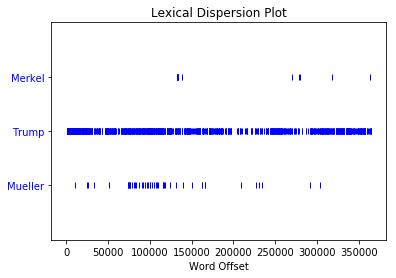

In [154]:
nltk_comments.dispersion_plot(['Merkel','Trump','Mueller'])

#### Question

How to interpret this figure?

#### \*\*\* Exercise

Use posts from the [New York Times](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/nytimes.tab) and [Fox News](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab).
For each page:
- Sort the data by the **posts'** Timestamp;
- Select the post message column and `.join()` the posts into one string;
- Tokenize the text;
- Compute word frequencies; compute the relative frequency of the word Trump;
- Make a dispersion plot for 'Kelly','Cohen','Pelosi', and 'Trump'.

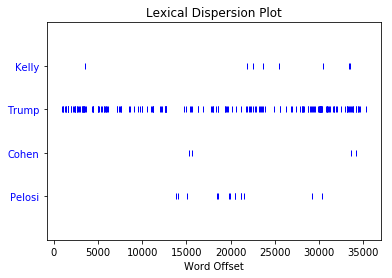

In [189]:
# NYT
import pandas as pd
url = "https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/nytimes.tab"
nyt_post = pd.read_csv(url,sep='\t',parse_dates=['post_published'])
nyt_post_sorted = nyt_post.sort_values(by='post_published')

nyt_post_sorted['post_message'] = nyt_post_sorted['post_message'].astype(str)

import nltk
post = ' '.join(nyt_post_sorted['post_message'])
post_tokens = word_tokenize(post)
nltk_post = nltk.text.Text(post_tokens)

from nltk.tokenize import regexp_tokenize
post_tokens  = regexp_tokenize(post,pattern='\w+')

fq = nltk.FreqDist(post_tokens)
fq['Trump']

rq = fq['Trump']/len(nltk_post) 
rq

nltk_post.dispersion_plot(['Kelly','Trump','Cohen','Pelosi'])








                                               
                                               
                                               
                                               
                                               

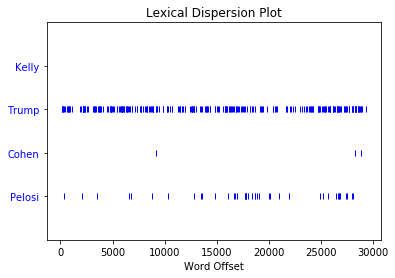

In [190]:
# FN
import pandas as pd
url = "https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab"
fn_post = pd.read_csv(url,sep='\t',parse_dates=['post_published'])
fn_post_sorted = fn_post.sort_values(by='post_published')

fn_post_sorted['post_message'] = fn_post_sorted['post_message'].astype(str)

import nltk
post = ' '.join(fn_post_sorted['post_message'])
post_tokens = word_tokenize(post)
nltk_post = nltk.text.Text(post_tokens)

from nltk.tokenize import regexp_tokenize
post_tokens  = regexp_tokenize(post,pattern='\w+')

fq = nltk.FreqDist(post_tokens)
fq['Trump']

rq = fq['Trump']/len(nltk_post) 
rq

nltk_post.dispersion_plot(['Kelly','Trump','Cohen','Pelosi'])








                                               
                                               
                                               
                                               
                                               

The dispersion plot tells you where certain words occur, by plotting the offsets, but not how often. To make things easier for you, I created a function `count_words_from_list` that takes a list of words and then computes how often these words appear. Run the cell below to load the function.

In [14]:
from collections import Counter

def count_words_from_list(text,words2count):
    tokens = word_tokenize(text.lower()) # convert string to tokens
    wordfreq = Counter(tokens) # count the tokens, i.e. map tokens to their frequency
    counter = 0
    for w in words2count:
        counter+=wordfreq.get(w,0)
    
    return counter 


To give an example: below we search for three words and compute how often they appears in a comment. We save this information in a new column with the name "comment_about_trump"

In [15]:
words2count = ['president','trump','donald']
nyt_comments_sorted['comment_about_trump'] = nyt_comments_sorted['comment_message'].apply(count_words_from_list,
                                                            words2count=words2count)



NameError: name 'nyt_comments_sorted' is not defined

In [16]:
nyt_comments_sorted.head()

NameError: name 'nyt_comments_sorted' is not defined

To plot the results properly, we have to use the timestamp of the comment as the Index of the DataFrame. This is rather technical stuff--do not worry, just run the code.

In [17]:
nyt_comments_sorted.set_index(nyt_comments_sorted["comment_published"],inplace=True)

NameError: name 'nyt_comments_sorted' is not defined

The figure below plots the results by timestamp. Of course, on such a granularity it is difficult observe trends over time.

In [ ]:
%matplotlib inline
nyt_comments_sorted['comment_about_trump'].plot()

Luckily, in Pandas we can easily group our data by hour or day and compute the salience of the Trump topic in the New Your Times.

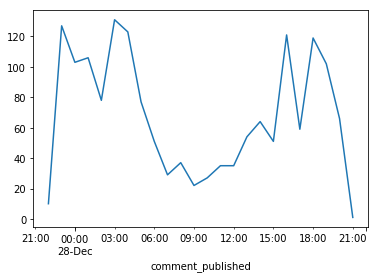

In [198]:
nyt_comments_sorted['comment_about_trump'].resample('h').sum().plot() # sum by hour

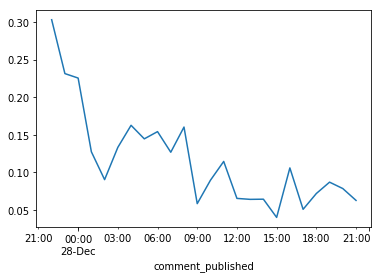

In [199]:
nyt_comments_sorted['comment_about_trump'].resample('h').mean().plot() # mean by hour

#### Question

How to interpret these figures and the diverging trends?

The first graph shows that how many comments are being published in 24 hours (from 21:00 to 21:00, from 0 comment to max). The second graph illustrates that in 24 hours, how long a Trump-related comment would be posted，the interval between two comments. 

#### Exercise

What about Robert Mueller? Plot the saliency of this topic (use words "mueller" and "counsel").

AxesSubplot(0.125,0.2;0.775x0.68) AxesSubplot(0.125,0.2;0.775x0.68)


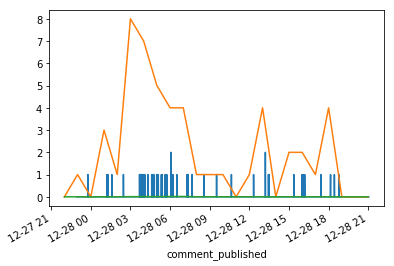

In [200]:
# insert code here
from collections import Counter
def count_words_from_list(text,words2count):
    tokens = word_tokenize(text.lower()) # convert string to tokens
    wordfreq = Counter(tokens) # count the tokens, i.e. map tokens to their frequency
    counter = 0
    for w in words2count:
        counter+=wordfreq.get(w,0)
    
    return counter 

words2count = ['mueller','counsel']
nyt_comments_sorted['comment_about_mueller'] = nyt_comments_sorted['comment_message'].apply(count_words_from_list,
                                                            words2count=words2count)
nyt_comments_sorted.set_index(nyt_comments_sorted["comment_published"],inplace=True)

%matplotlib inline
nyt_comments_sorted['comment_about_mueller'].plot()
A = nyt_comments_sorted['comment_about_mueller'].resample('h').sum().plot()
B = nyt_comments_sorted['comment_about_mueller'].resample('h').mean().plot()
print (A, B)

# Congratulations with completing the course!

Run the code below to congratulate yourself!

In [88]:
print("🐱"*100)
print("🐶"*100)

🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱🐱
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## 3. Optional Research Scenario: Training an ideological classifier (Advanced Topic)

The part below is optional. It gives code to train an ideology classifier.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score,accuracy_score  

Download the "cldata.csv" on Canvas. This contains rows with texts and labels."0" means that the post was retrieved from the New York Times, "1" that comments was writen on the Fox News page.

In [3]:
all_data = pd.read_csv('cldata.csv',index_col=0)
all_data.head()

,comment_message,label
65701,They should remove their license they could ha...,1
34276,Gowdy for President. I'm sure he is Republican...,1
37792,I am 16 months older then my brother. I can ...,1
13332,"Whatever it is, it's creepy and they aren't ge...",1
16516,What's with her rigid hand movements when she ...,1


To understand how the data was created, consult the appendix below.

We divide the data into a train and test set. We use 80% for training, 20% for testing.

In [4]:
cut_off = int(all_data.shape[0]*0.8)
cut_off

103288

In [5]:
train,y_train = all_data['comment_message'][:cut_off],all_data['label'][:cut_off]

In [6]:
test,y_test = all_data['comment_message'][cut_off:],all_data['label'][cut_off:]

Subsequently we use the CountVectorizer to create a [document-term matrix](https://en.wikipedia.org/wiki/Document-term_matrix). To understand the arguments, consult the [CountVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

In [7]:
vectorizer = CountVectorizer (ngram_range=(1,3),max_df=0.9,min_df=20)

In [8]:
X_train = vectorizer.fit_transform(train)

In [9]:
X_test = vectorizer.transform(test)

The code below initializes a classifier model and fits the parameters.

In [10]:
classifier = LinearSVC(C=10,class_weight='balanced')
classifier.fit(X_train,y_train)

/Users/ivanfeng/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

After training the model, we calculate labels for the data we separated for testing purposes.

In [11]:
predictions = classifier.predict(X_test)

And compute how accurarte the classifier performed on these test examples.

In [12]:
score = accuracy_score(predictions,y_test)
print(score)

0.7082720161102936


#### \*\*\* Building an Emotion Classifier (Optional)

### Appendix

Code to create classifier data from Netvizz data

In [2]:
import pandas as pd
import random
from nltk.tokenize import wordpunct_tokenize

def count_tokens(string):
    tokens = wordpunct_tokenize(str(string))
    return len(tokens)

nyt = pd.read_csv('../classifierdata/nyt_comments.tab',sep='\t')
fn = pd.read_csv('../classifierdata/fn_comments.tab',sep='\t')
nyt['comment_message_length'] = nyt['comment_message'].apply(count_tokens)
fn['comment_message_length'] = fn['comment_message'].apply(count_tokens)
nyt_long = nyt[nyt['comment_message_length'] > 10]
fn_long = fn[fn['comment_message_length'] > 10]
fn_long_reduced = fn_long.iloc[:nyt_long.shape[0],:]
all_data = pd.concat([nyt_long,fn_long_reduced])
labels = np.asarray([0]*nyt_long.shape[0] + [1]*fn_long_reduced.shape[0])
all_data.shape[0]==labels.shape[0]
all_data['label'] = labels
order = np.asarray(range(0,all_data.shape[0]))
random.shuffle(order)
all_data = all_data.iloc[order,:]
cldata = all_data.loc[:,['comment_message','label']]
cldata.to_csv('cldata.csv')

FileNotFoundError: File b'../classifierdata/nyt_comments.tab' does not exist